In [1]:
from rdkit import Chem
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, ShuffleSplit, GridSearchCV, cross_val_score, cross_validate
import os
import glob
from scipy.stats import norm
import math
import random

/home/rdkit/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error 


T_0 = pd.read_excel('FLT3FLZy.xlsx')
T=np.array(T_0)
#from sklearn import preprocessing  
#min_max_scaler = preprocessing.MinMaxScaler() 
#T=T_minMax = min_max_scaler.fit_transform(T)
#T=T.ravel()

print(T)  
print(len(T))

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]
2601


In [3]:
#读入特征    1000种描述符数据 
X=pd.read_excel('FLT3FLZx.xlsx')
X=np.array(X) 
#min_max_scaler = preprocessing.MinMaxScaler() 
#X=X_minMax = min_max_scaler.fit_transform(X)
print(X)
print(len(X[0]))
print(len(X))

[[0 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]]
1024
2601


In [4]:
from sklearn.model_selection import train_test_split
X_train,  X_test,  T_train,  T_test  =  train_test_split(X,T,test_size=0.100,random_state=19)

In [5]:
from sklearn.metrics import accuracy_score,precision_score,f1_score
import lightgbm as lgbm

clf=lgbm.LGBMClassifier(boosting_type='gbdt',colsample_bytree=0.8,feature_fraction=0.8,bagging_fraction=0.1,num_leaves=10,min_child_samples=70,max_depth=-1,
                        learning_rate=0.05,n_estimators=600, n_jobs=1)
clf.fit(X_train,T_train)


[LightGBM] [Warning] bagging_fraction is set=0.1, subsample=1.0 will be ignored. Current value: bagging_fraction=0.1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.8


/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(bagging_fraction=0.1, colsample_bytree=0.8, feature_fraction=0.8,
               learning_rate=0.05, min_child_samples=70, n_estimators=600,
               n_jobs=1, num_leaves=10)

In [6]:
import pandas as pd
import numpy as np
import time
import logging
import os, sys
import psutil
import lightgbm as lgb
from datetime import datetime

from itertools import cycle
from sklearn import svm
from sklearn.metrics import *

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
#from sklearn.externals import joblib
from scipy import interp

T_pred = clf.predict(X_test)
confusion_matrix(T_test, T_pred)

array([[134,   6],
       [  5, 116]])

In [7]:
print (classification_report(T_test, T_pred , digits=4))

              precision    recall  f1-score   support

           0     0.9640    0.9571    0.9606       140
           1     0.9508    0.9587    0.9547       121

    accuracy                         0.9579       261
   macro avg     0.9574    0.9579    0.9577       261
weighted avg     0.9579    0.9579    0.9579       261



In [8]:
f1=f1_score(T_test,T_pred,average='micro')
print("the f1 score: %.3f"%f1)

the f1 score: 0.958


<Figure size 1000x1000 with 0 Axes>

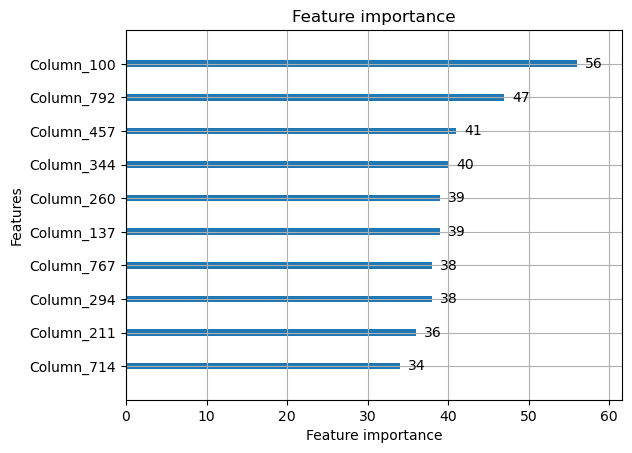

In [9]:
from lightgbm import plot_importance
# 显示重要特征
fig = plt.figure(figsize=(10,10))
plot_importance(clf,max_num_features=10)
plt.show()

In [10]:
T_pred = clf.predict(X_train)
confusion_matrix(T_train, T_pred)

array([[1267,    5],
       [   2, 1066]])

In [11]:
print (classification_report(T_train, T_pred , digits=4))

              precision    recall  f1-score   support

           0     0.9984    0.9961    0.9972      1272
           1     0.9953    0.9981    0.9967      1068

    accuracy                         0.9970      2340
   macro avg     0.9969    0.9971    0.9970      2340
weighted avg     0.9970    0.9970    0.9970      2340



In [ ]:
# 十倍交叉验证

In [12]:

from sklearn.model_selection import cross_validate

clf = lgbm.LGBMClassifier(boosting_type='gbdt', colsample_bytree=0.8, feature_fraction=0.8, bagging_fraction=0.1, num_leaves=10, 
                          min_child_samples=70, max_depth=-1, learning_rate=0.05, n_estimators=600, n_jobs=1)
cv = 10  # 十倍交叉验证的折数
scoring = ['accuracy', 'precision_macro', 'f1_macro']  # 评估指标


In [13]:
scores = cross_validate(clf, X_train, T_train, cv=cv, scoring=scoring, return_train_score=True)

mean_accuracy = scores['test_accuracy'].mean()
mean_precision = scores['test_precision_macro'].mean()
mean_f1 = scores['test_f1_macro'].mean()

std_accuracy = scores['test_accuracy'].std()
std_precision = scores['test_precision_macro'].std()
std_f1 = scores['test_f1_macro'].std()

mean_train_accuracy = scores['train_accuracy'].mean()
mean_train_precision = scores['train_precision_macro'].mean()
mean_train_f1 = scores['train_f1_macro'].mean()

std_train_accuracy = scores['train_accuracy'].std()
std_train_precision = scores['train_precision_macro'].std()
std_train_f1 = scores['train_f1_macro'].std()

print(f'Mean Accuracy (Test): {mean_accuracy:.4f} ± {std_accuracy:.4f}')
print(f'Mean Precision (Test): {mean_precision:.4f} ± {std_precision:.4f}')
print(f'Mean F1 Score (Test): {mean_f1:.4f} ± {std_f1:.4f}')

print(f'Mean Accuracy (Train): {mean_train_accuracy:.4f} ± {std_train_accuracy:.4f}')
print(f'Mean Precision (Train): {mean_train_precision:.4f} ± {std_train_precision:.4f}')
print(f'Mean F1 Score (Train): {mean_train_f1:.4f} ± {std_train_f1:.4f}')


[LightGBM] [Warning] bagging_fraction is set=0.1, subsample=1.0 will be ignored. Current value: bagging_fraction=0.1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.8


/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

[LightGBM] [Warning] bagging_fraction is set=0.1, subsample=1.0 will be ignored. Current value: bagging_fraction=0.1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.8


/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] bagging_fraction is set=0.1, subsample=1.0 will be ignored. Current value: bagging_fraction=0.1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.8


/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] bagging_fraction is set=0.1, subsample=1.0 will be ignored. Current value: bagging_fraction=0.1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.8


/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] bagging_fraction is set=0.1, subsample=1.0 will be ignored. Current value: bagging_fraction=0.1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.8


/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] bagging_fraction is set=0.1, subsample=1.0 will be ignored. Current value: bagging_fraction=0.1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.8


/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] bagging_fraction is set=0.1, subsample=1.0 will be ignored. Current value: bagging_fraction=0.1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.8


/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] bagging_fraction is set=0.1, subsample=1.0 will be ignored. Current value: bagging_fraction=0.1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.8


/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] bagging_fraction is set=0.1, subsample=1.0 will be ignored. Current value: bagging_fraction=0.1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.8


/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] bagging_fraction is set=0.1, subsample=1.0 will be ignored. Current value: bagging_fraction=0.1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.8
Mean Accuracy (Test): 0.9184 ± 0.0192
Mean Precision (Test): 0.9179 ± 0.0193
Mean F1 Score (Test): 0.9180 ± 0.0192
Mean Accuracy (Train): 0.9985 ± 0.0004
Mean Precision (Train): 0.9984 ± 0.0005
Mean F1 Score (Train): 0.9985 ± 0.0005


In [14]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='liblinear',multi_class='ovr', C = 5, verbose = 100, max_iter=800)
clf.fit(X_train, T_train)

[LibLinear]iter  1 act 4.412e+03 pre 3.891e+03 delta 1.241e+00 f 8.110e+03 |g| 1.872e+04 CG   5
cg reaches trust region boundary
iter  2 act 1.173e+03 pre 9.600e+02 delta 1.685e+00 f 3.697e+03 |g| 5.123e+03 CG   5
cg reaches trust region boundary
iter  3 act 6.784e+02 pre 6.000e+02 delta 2.166e+00 f 2.525e+03 |g| 1.845e+03 CG   5
cg reaches trust region boundary
iter  4 act 5.249e+02 pre 4.556e+02 delta 2.772e+00 f 1.846e+03 |g| 9.925e+02 CG   6
cg reaches trust region boundary
iter  5 act 3.926e+02 pre 3.358e+02 delta 3.520e+00 f 1.322e+03 |g| 5.888e+02 CG   7


/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


cg reaches trust region boundary
iter  6 act 2.957e+02 pre 2.524e+02 delta 4.567e+00 f 9.289e+02 |g| 4.995e+02 CG   9
cg reaches trust region boundary
iter  7 act 1.918e+02 pre 1.612e+02 delta 5.789e+00 f 6.332e+02 |g| 2.109e+02 CG  13
iter  8 act 6.952e+01 pre 6.165e+01 delta 5.789e+00 f 4.414e+02 |g| 1.122e+02 CG  27
iter  9 act 6.698e+00 pre 6.174e+00 delta 5.789e+00 f 3.719e+02 |g| 3.840e+01 CG  29
iter 10 act 4.913e-01 pre 4.750e-01 delta 5.789e+00 f 3.652e+02 |g| 6.908e+00 CG  38
iter 11 act 1.477e-02 pre 1.434e-02 delta 5.789e+00 f 3.647e+02 |g| 1.437e+00 CG  32


LogisticRegression(C=5, max_iter=800, multi_class='ovr', solver='liblinear',
                   verbose=100)

In [15]:
import pandas as pd
import numpy as np
import time
import logging
import os, sys
import psutil
import lightgbm as lgb
from datetime import datetime

from itertools import cycle
from sklearn import svm
from sklearn.metrics import *

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

from scipy import interp

T_pred = clf.predict(X_test)
confusion_matrix(T_test, T_pred)

array([[130,  10],
       [ 14, 107]])

In [16]:
precision_score(T_test, T_pred,average='micro')
recall_score(T_test, T_pred,average='micro')
f1_score(T_test, T_pred,average='micro')

0.9080459770114943

In [17]:
print (classification_report(T_test, T_pred , digits=4))

              precision    recall  f1-score   support

           0     0.9028    0.9286    0.9155       140
           1     0.9145    0.8843    0.8992       121

    accuracy                         0.9080       261
   macro avg     0.9087    0.9064    0.9073       261
weighted avg     0.9082    0.9080    0.9079       261



In [18]:
T_pred = clf.predict(X_train)
confusion_matrix(T_train, T_pred)

array([[1271,    1],
       [   1, 1067]])

In [19]:
print (classification_report(T_train, T_pred , digits=4))

              precision    recall  f1-score   support

           0     0.9992    0.9992    0.9992      1272
           1     0.9991    0.9991    0.9991      1068

    accuracy                         0.9991      2340
   macro avg     0.9991    0.9991    0.9991      2340
weighted avg     0.9991    0.9991    0.9991      2340



In [20]:
import sklearn.neural_network as sk_nn
clf = sk_nn.MLPClassifier(activation='relu',solver='adam',alpha=1,learning_rate='adaptive',learning_rate_init=0.001,max_iter=800)
clf.fit(X_train,T_train)


/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(alpha=1, learning_rate='adaptive', max_iter=800)

In [21]:
T_pred = clf.predict(X_train)
confusion_matrix(T_train, T_pred)

array([[1268,    4],
       [   6, 1062]])

In [22]:
T_pred = clf.predict(X_test)
confusion_matrix(T_test, T_pred)

array([[131,   9],
       [ 10, 111]])

In [23]:
print (classification_report(T_test, T_pred , digits=4))

              precision    recall  f1-score   support

           0     0.9291    0.9357    0.9324       140
           1     0.9250    0.9174    0.9212       121

    accuracy                         0.9272       261
   macro avg     0.9270    0.9265    0.9268       261
weighted avg     0.9272    0.9272    0.9272       261



In [24]:
import sklearn.neighbors as sk_neighbors
clf = sk_neighbors.KNeighborsClassifier(n_neighbors=3) 
clf.fit(X_train,T_train)

/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [25]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier (
bootstrap=True, max_depth=None,
max_features='auto', max_leaf_nodes=None,
min_impurity_decrease=0.0,
min_samples_leaf=1, min_samples_split=10,
min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=2,
oob_score=False, random_state=725, verbose=0, warm_start=False)
clf.fit(X_train,T_train) # 使用训练集训练模型
T_pre = clf.predict(X_test) # 使用模型对测试集进行预测

/tmp/ipykernel_89832/987808909.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,T_train) # 使用训练集训练模型


In [126]:
from sklearn.tree import DecisionTreeClassifier
 
clf = DecisionTreeClassifier(                         splitter="best",
                         max_depth=None,
                         min_samples_split=20,
                         min_samples_leaf=10,
                         min_weight_fraction_leaf=0.0,
                         max_features=0.5,
                         random_state=2,
                         max_leaf_nodes=None,
                         min_impurity_decrease=0)
 # 所以参数均置为默认状态
clf.fit(X_train,T_train) # 使用训练集训练模型
T_pre = clf.predict(X_test) # 使用模型对测试集进行预测

In [127]:
from sklearn.metrics import accuracy_score
 
print (accuracy_score(T_pre, T_test))

0.9003831417624522


In [128]:
T_pred = clf.predict(X_test)
confusion_matrix(T_test, T_pred)

array([[128,  12],
       [ 14, 107]])

In [129]:
print (classification_report(T_test, T_pred , digits=4))

              precision    recall  f1-score   support

           0     0.9014    0.9143    0.9078       140
           1     0.8992    0.8843    0.8917       121

    accuracy                         0.9004       261
   macro avg     0.9003    0.8993    0.8997       261
weighted avg     0.9004    0.9004    0.9003       261

